In [53]:
import pandas as pd
import numpy as np
print('Imported')

Imported


Load dataset for predict loan payoff and EDA it.

In [54]:
df_loan = pd.read_csv('https://raw.githubusercontent.com/maxtran1997gmail/Files/main/loan_train.csv')
df_loan.head(10)

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male
5,7,7,PAIDOFF,1000,30,9/9/2016,10/8/2016,36,college,male
6,8,8,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,male
7,9,9,PAIDOFF,800,15,9/10/2016,9/24/2016,26,college,male
8,10,10,PAIDOFF,300,7,9/10/2016,9/16/2016,29,college,male
9,11,11,PAIDOFF,1000,15,9/10/2016,10/9/2016,39,High School or Below,male


In [55]:
df_loan.shape

(346, 10)

loan_status is the target we need to predict, we use another features to predict it. Before predict it, we need to standardize and normalization.

In [56]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      346 non-null    int64 
 1   Unnamed: 0.1    346 non-null    int64 
 2   loan_status     346 non-null    object
 3   Principal       346 non-null    int64 
 4   terms           346 non-null    int64 
 5   effective_date  346 non-null    object
 6   due_date        346 non-null    object
 7   age             346 non-null    int64 
 8   education       346 non-null    object
 9   Gender          346 non-null    object
dtypes: int64(5), object(5)
memory usage: 27.2+ KB


#### Standardize
Change df_loan[['loan_status', 'education', 'Gender']] from type object to int64, insert df_loan['time']=df_loan['due_date']-df_loan['effective_data]

In [57]:
y = np.asarray(df_loan['loan_status'])
values, counts = np.unique(y, return_counts=True) #check values in df['loan_status']
print(values)
print(counts)

['COLLECTION' 'PAIDOFF']
[ 86 260]


In [58]:
#change PAIDOFF = 1, COLLECTION = 0
df_loan['loan_status'].replace('PAIDOFF', 1, inplace = True)
df_loan['loan_status'].replace('COLLECTION', 0, inplace = True)
df_loan.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,1,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,1,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,1,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,1,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,1,1000,30,9/9/2016,10/8/2016,29,college,male


In [59]:
# PAIDOFF, COLLECTION had been changed to 1,0 and df_loan['loan_status'] from object->int64
df_loan.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      346 non-null    int64 
 1   Unnamed: 0.1    346 non-null    int64 
 2   loan_status     346 non-null    int64 
 3   Principal       346 non-null    int64 
 4   terms           346 non-null    int64 
 5   effective_date  346 non-null    object
 6   due_date        346 non-null    object
 7   age             346 non-null    int64 
 8   education       346 non-null    object
 9   Gender          346 non-null    object
dtypes: int64(6), object(4)
memory usage: 27.2+ KB


In [60]:
y = np.asarray(df_loan['education'])
values, counts = np.unique(y, return_counts=True)#check values in df_loan['education']
print(values)
print(counts)

['Bechalor' 'High School or Below' 'Master or Above' 'college']
[ 44 151   2 149]


In [61]:
#replace values 'High School or Below' = 1, 'college' = 2, 'Bechalor' = 3, 'Master or Above' = 4
df_loan['education'].replace('High School or Below', 1, inplace = True)
df_loan['education'].replace('college', 2, inplace = True)
df_loan['education'].replace('Bechalor', 3, inplace = True)
df_loan['education'].replace('Master or Above', 4, inplace = True)
df_loan.head(10)

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,1,1000,30,9/8/2016,10/7/2016,45,1,male
1,2,2,1,1000,30,9/8/2016,10/7/2016,33,3,female
2,3,3,1,1000,15,9/8/2016,9/22/2016,27,2,male
3,4,4,1,1000,30,9/9/2016,10/8/2016,28,2,female
4,6,6,1,1000,30,9/9/2016,10/8/2016,29,2,male
5,7,7,1,1000,30,9/9/2016,10/8/2016,36,2,male
6,8,8,1,1000,30,9/9/2016,10/8/2016,28,2,male
7,9,9,1,800,15,9/10/2016,9/24/2016,26,2,male
8,10,10,1,300,7,9/10/2016,9/16/2016,29,2,male
9,11,11,1,1000,15,9/10/2016,10/9/2016,39,1,male


In [62]:
#replaced values 'High School or Below' = 1, 'college' = 2, 'Bechalor' = 3, 'Master or Above' = 4
#df_loan['education'] from object to int64
df_loan.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      346 non-null    int64 
 1   Unnamed: 0.1    346 non-null    int64 
 2   loan_status     346 non-null    int64 
 3   Principal       346 non-null    int64 
 4   terms           346 non-null    int64 
 5   effective_date  346 non-null    object
 6   due_date        346 non-null    object
 7   age             346 non-null    int64 
 8   education       346 non-null    int64 
 9   Gender          346 non-null    object
dtypes: int64(7), object(3)
memory usage: 27.2+ KB


In [63]:
y = np.asarray(df_loan['Gender'])
values, counts = np.unique(y, return_counts=True)#check values in df_loan['Gender']
print(values)
print(counts)

['female' 'male']
[ 52 294]


In [64]:
#change male = 1, female = 0
df_loan['Gender'].replace('male', 1, inplace = True)
df_loan['Gender'].replace('female', 0, inplace = True)
df_loan.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,1,1000,30,9/8/2016,10/7/2016,45,1,1
1,2,2,1,1000,30,9/8/2016,10/7/2016,33,3,0
2,3,3,1,1000,15,9/8/2016,9/22/2016,27,2,1
3,4,4,1,1000,30,9/9/2016,10/8/2016,28,2,0
4,6,6,1,1000,30,9/9/2016,10/8/2016,29,2,1


In [65]:
#replaced values 'male' = 1, 'female' = 0
#df_loan['Gender'] from object to int64
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      346 non-null    int64 
 1   Unnamed: 0.1    346 non-null    int64 
 2   loan_status     346 non-null    int64 
 3   Principal       346 non-null    int64 
 4   terms           346 non-null    int64 
 5   effective_date  346 non-null    object
 6   due_date        346 non-null    object
 7   age             346 non-null    int64 
 8   education       346 non-null    int64 
 9   Gender          346 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 27.2+ KB


#### =>> I had been completed replacion job. Now, we insert column  df_loan['time']=df_loan['due_date']-df_loan['effective_data']

In [66]:
#change type of 'effective_date' and 'due_date' to datetime
df_loan['effective_date'] = pd.to_datetime(df_loan['effective_date'])
df_loan['due_date'] = pd.to_datetime(df_loan['due_date'])
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unnamed: 0      346 non-null    int64         
 1   Unnamed: 0.1    346 non-null    int64         
 2   loan_status     346 non-null    int64         
 3   Principal       346 non-null    int64         
 4   terms           346 non-null    int64         
 5   effective_date  346 non-null    datetime64[ns]
 6   due_date        346 non-null    datetime64[ns]
 7   age             346 non-null    int64         
 8   education       346 non-null    int64         
 9   Gender          346 non-null    int64         
dtypes: datetime64[ns](2), int64(8)
memory usage: 27.2 KB


In [67]:
df_loan.insert(1, 'Time', df_loan['due_date']-df_loan['effective_date'])
df_loan.head()

,Unnamed: 0,Time,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,29 days,0,1,1000,30,2016-09-08,2016-10-07,45,1,1
1,2,29 days,2,1,1000,30,2016-09-08,2016-10-07,33,3,0
2,3,14 days,3,1,1000,15,2016-09-08,2016-09-22,27,2,1
3,4,29 days,4,1,1000,30,2016-09-09,2016-10-08,28,2,0
4,6,29 days,6,1,1000,30,2016-09-09,2016-10-08,29,2,1


In [68]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype          
---  ------          --------------  -----          
 0   Unnamed: 0      346 non-null    int64          
 1   Time            346 non-null    timedelta64[ns]
 2   Unnamed: 0.1    346 non-null    int64          
 3   loan_status     346 non-null    int64          
 4   Principal       346 non-null    int64          
 5   terms           346 non-null    int64          
 6   effective_date  346 non-null    datetime64[ns] 
 7   due_date        346 non-null    datetime64[ns] 
 8   age             346 non-null    int64          
 9   education       346 non-null    int64          
 10  Gender          346 non-null    int64          
dtypes: datetime64[ns](2), int64(8), timedelta64[ns](1)
memory usage: 29.9 KB


In [69]:
df_loan_clean = df_loan[['Principal', 'terms', 'age', 'education', 'Gender', 'Time', 'loan_status']]
df_loan_clean

,Principal,terms,age,education,Gender,Time,loan_status
0,1000,30,45,1,1,29 days,1
1,1000,30,33,3,0,29 days,1
2,1000,15,27,2,1,14 days,1
3,1000,30,28,2,0,29 days,1
4,1000,30,29,2,1,29 days,1
...,...,...,...,...,...,...,...
341,800,15,32,1,1,14 days,0
342,1000,30,25,1,1,29 days,0
343,800,15,39,2,1,14 days,0
344,1000,30,28,2,1,59 days,0


In [70]:
df_loan_clean['Time'] = df_loan_clean['Time'] / np.timedelta64(1, 'D')
df_loan_clean['Time']

/var/folders/hw/t1pd79hx7f36fky47_32wvtw0000gn/T/ipykernel_6874/981640090.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loan_clean['Time'] = df_loan_clean['Time'] / np.timedelta64(1, 'D')


0      29.0
1      29.0
2      14.0
3      29.0
4      29.0
       ... 
341    14.0
342    29.0
343    14.0
344    59.0
345    29.0
Name: Time, Length: 346, dtype: float64

In [71]:
df_loan_clean

,Principal,terms,age,education,Gender,Time,loan_status
0,1000,30,45,1,1,29.0,1
1,1000,30,33,3,0,29.0,1
2,1000,15,27,2,1,14.0,1
3,1000,30,28,2,0,29.0,1
4,1000,30,29,2,1,29.0,1
...,...,...,...,...,...,...,...
341,800,15,32,1,1,14.0,0
342,1000,30,25,1,1,29.0,0
343,800,15,39,2,1,14.0,0
344,1000,30,28,2,1,59.0,0


In [72]:
df_loan_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Principal    346 non-null    int64  
 1   terms        346 non-null    int64  
 2   age          346 non-null    int64  
 3   education    346 non-null    int64  
 4   Gender       346 non-null    int64  
 5   Time         346 non-null    float64
 6   loan_status  346 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 19.0 KB


In [75]:
# huhu :((( Type of 'Time' is float64, now i will change it to int64
df_loan_clean['Time'] = df_loan_clean['Time'].astype(int)

/var/folders/hw/t1pd79hx7f36fky47_32wvtw0000gn/T/ipykernel_6874/369715838.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loan_clean['Time'] = df_loan_clean['Time'].astype(int)


In [76]:
df_loan_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Principal    346 non-null    int64
 1   terms        346 non-null    int64
 2   age          346 non-null    int64
 3   education    346 non-null    int64
 4   Gender       346 non-null    int64
 5   Time         346 non-null    int64
 6   loan_status  346 non-null    int64
dtypes: int64(7)
memory usage: 19.0 KB


#### Nomalization
Principal values are to large with others. So i will divide it by 100

In [81]:
#df_loan_clean['Principal'] = df_loan_clean['Principal']/100
df_loan_clean['Principal'] = df_loan_clean['Principal'].astype(int)
df_loan_clean

/var/folders/hw/t1pd79hx7f36fky47_32wvtw0000gn/T/ipykernel_6874/2389941997.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loan_clean['Principal'] = df_loan_clean['Principal'].astype(int)


,Principal,terms,age,education,Gender,Time,loan_status
0,10,30,45,1,1,29,1
1,10,30,33,3,0,29,1
2,10,15,27,2,1,14,1
3,10,30,28,2,0,29,1
4,10,30,29,2,1,29,1
...,...,...,...,...,...,...,...
341,8,15,32,1,1,14,0
342,10,30,25,1,1,29,0
343,8,15,39,2,1,14,0
344,10,30,28,2,1,59,0


In [82]:
df_loan_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Principal    346 non-null    int64
 1   terms        346 non-null    int64
 2   age          346 non-null    int64
 3   education    346 non-null    int64
 4   Gender       346 non-null    int64
 5   Time         346 non-null    int64
 6   loan_status  346 non-null    int64
dtypes: int64(7)
memory usage: 19.0 KB


In [84]:
df_loan_clean.shape

(346, 7)

### Now dataset df_loan_clean absolute is clean. Ending of process EDA
The target variable is df_loan_clean['loan_status']
The predict variables are df_loan_clean[['Principal', 'terms', 'age', 'education', 'Gender', 'Time']]


In [86]:
# pick predict variables and convert it to array
x = np.asarray(df_loan_clean[['Principal', 'terms', 'age', 'education', 'Gender', 'Time']])
x[0:8]

array([[10, 30, 45,  1,  1, 29],
       [10, 30, 33,  3,  0, 29],
       [10, 15, 27,  2,  1, 14],
       [10, 30, 28,  2,  0, 29],
       [10, 30, 29,  2,  1, 29],
       [10, 30, 36,  2,  1, 29],
       [10, 30, 28,  2,  1, 29],
       [ 8, 15, 26,  2,  1, 14]])

In [87]:
# pick target variables and convert it to array
y = np.asarray(df_loan_clean['loan_status'])
y[0:8]

array([1, 1, 1, 1, 1, 1, 1, 1])

Then, i will normalize the predict dataset

In [90]:
from sklearn import preprocessing
x = preprocessing.StandardScaler().fit(x).transform(x)
x[0:8]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.99512471,  0.42056004,
         0.53257725],
       [ 0.51578458,  0.92071769,  0.34170148,  1.83872837, -2.37778177,
         0.53257725],
       [ 0.51578458, -0.95911111, -0.65321055,  0.42180183,  0.42056004,
        -0.88417105],
       [ 0.51578458,  0.92071769, -0.48739188,  0.42180183, -2.37778177,
         0.53257725],
       [ 0.51578458,  0.92071769, -0.3215732 ,  0.42180183,  0.42056004,
         0.53257725],
       [ 0.51578458,  0.92071769,  0.8391575 ,  0.42180183,  0.42056004,
         0.53257725],
       [ 0.51578458,  0.92071769, -0.48739188,  0.42180183,  0.42056004,
         0.53257725],
       [-1.31458942, -0.95911111, -0.81902922,  0.42180183,  0.42056004,
        -0.88417105]])

I split our dataset into 75% for train set and 25% for test set

In [93]:
#import library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [109]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.25, random_state=0)
print ('Traning dataset:', x_train.shape,  y_train.shape)
print ('Testing dataset:', x_test.shape,  y_test.shape)

Traning dataset: (259, 6) (259,)
Testing dataset: (87, 6) (87,)


In [110]:
LR_liblinear = LogisticRegression(C=0.01, solver='liblinear').fit(x_train,y_train)
#solver{‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’
LR_liblinear

LogisticRegression(C=0.01, solver='liblinear')

In [111]:
yhat_liblinear = LR_liblinear.predict(x_test)  #yhat are result after i user Logistic Regression with solver = liblinear
yhat_liblinear

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

**yhat_liblinear_prob** returns estimates for all classes. The first column is the probability of class 0, **P(Y=0|X)**, and second column is probability of class 1, **P(Y=1|X)**

In [112]:
yhat_liblinear_prob = LR_liblinear.predict_proba(x_test)
yhat_liblinear_prob

array([[0.45, 0.55],
       [0.45, 0.55],
       [0.43, 0.57],
       [0.45, 0.55],
       [0.45, 0.55],
       [0.37, 0.63],
       [0.39, 0.61],
       [0.38, 0.62],
       [0.44, 0.56],
       [0.35, 0.65],
       [0.4 , 0.6 ],
       [0.38, 0.62],
       [0.4 , 0.6 ],
       [0.47, 0.53],
       [0.44, 0.56],
       [0.45, 0.55],
       [0.38, 0.62],
       [0.39, 0.61],
       [0.35, 0.65],
       [0.45, 0.55],
       [0.4 , 0.6 ],
       [0.39, 0.61],
       [0.35, 0.65],
       [0.44, 0.56],
       [0.45, 0.55],
       [0.38, 0.62],
       [0.45, 0.55],
       [0.46, 0.54],
       [0.38, 0.62],
       [0.38, 0.62],
       [0.45, 0.55],
       [0.45, 0.55],
       [0.45, 0.55],
       [0.4 , 0.6 ],
       [0.4 , 0.6 ],
       [0.45, 0.55],
       [0.45, 0.55],
       [0.4 , 0.6 ],
       [0.38, 0.62],
       [0.45, 0.55],
       [0.45, 0.55],
       [0.4 , 0.6 ],
       [0.38, 0.62],
       [0.39, 0.61],
       [0.45, 0.55],
       [0.45, 0.55],
       [0.45, 0.55],
       [0.38,

In [113]:
LR_liblinear.score(x_test, y_test)

0.8275862068965517

#### Confusion matrix

In [114]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat_liblinear, labels=[1,0]))

[[71  2]
 [13  1]]


Confusion matrix, without normalization
[[71  2]
 [13  1]]


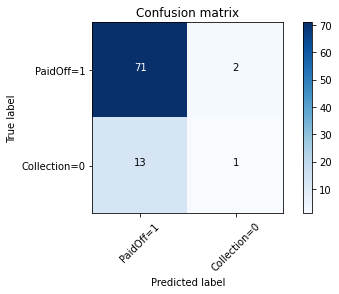

In [115]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat_liblinear, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['PaidOff=1','Collection=0'],normalize= False,  title='Confusion matrix')

In [116]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_liblinear_prob)

0.5855959709107708

### I try to use difference solver. 

In [118]:
LR_lbfgs = LogisticRegression(C=0.01, solver='lbfgs').fit(x_train,y_train)
#solver{‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’
yhat_lbfgs = LR_lbfgs.predict(x_test)  #yhat are result after i user Logistic Regression with solver = liblinear
yhat_lbfgs_prob = LR_lbfgs.predict_proba(x_test)
yhat_lbfgs_prob

array([[0.31, 0.69],
       [0.31, 0.69],
       [0.29, 0.71],
       [0.31, 0.69],
       [0.31, 0.69],
       [0.24, 0.76],
       [0.26, 0.74],
       [0.25, 0.75],
       [0.3 , 0.7 ],
       [0.23, 0.77],
       [0.27, 0.73],
       [0.25, 0.75],
       [0.27, 0.73],
       [0.32, 0.68],
       [0.3 , 0.7 ],
       [0.3 , 0.7 ],
       [0.25, 0.75],
       [0.26, 0.74],
       [0.22, 0.78],
       [0.3 , 0.7 ],
       [0.26, 0.74],
       [0.26, 0.74],
       [0.22, 0.78],
       [0.31, 0.69],
       [0.31, 0.69],
       [0.25, 0.75],
       [0.31, 0.69],
       [0.32, 0.68],
       [0.25, 0.75],
       [0.25, 0.75],
       [0.31, 0.69],
       [0.31, 0.69],
       [0.31, 0.69],
       [0.26, 0.74],
       [0.26, 0.74],
       [0.31, 0.69],
       [0.31, 0.69],
       [0.26, 0.74],
       [0.25, 0.75],
       [0.3 , 0.7 ],
       [0.31, 0.69],
       [0.26, 0.74],
       [0.25, 0.75],
       [0.26, 0.74],
       [0.31, 0.69],
       [0.31, 0.69],
       [0.3 , 0.7 ],
       [0.25,

In [120]:
LR_lbfgs.score(x_test, y_test)

0.8390804597701149

**=>>The score when solver = lbfgs better than score when solver = liblinear(0.82)**

Confusion matrix, without normalization
[[71  2]
 [13  1]]


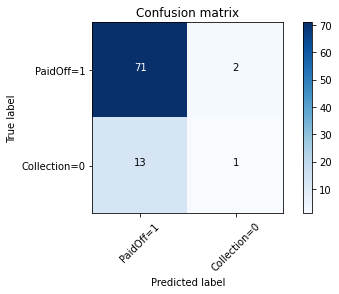

In [121]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat_liblinear, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['PaidOff=1','Collection=0'],normalize= False,  title='Confusion matrix')

In [122]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_lbfgs_prob)

0.47092272006043545

### To optimization the result, we can change solver, change the way we choose to split dataset, change % of train set, test set